# Build Random Forest Model

In [13]:
# Cheers again to Brunna Torino for their great analysis of real estate prices in Amsterdam 
# (https://towardsdatascience.com/ai-and-real-state-renting-in-amsterdam-part-1-5fce18238dbc)
# The ideas have been repurposed here to deal with the Washington, DC real estate market!

In [24]:
import numpy as np
import pandas as pd

apts = pd.read_csv('ApartmentList_Cleaned_NoOutliers.csv')
apts_ml = apts[['apt_rent', 'apt_footage', 'rooms', 'distance_wh', 'distance_cap', 'building_units_available']]

In [16]:
target= np.array(apts_ml['apt_rent'])
features = apts_ml.drop('apt_rent', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [17]:
## RANDOM FOREST - KFOLD AND MODEL 


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

Mean Absolute Error: 322.79
Accuracy: 87.33 %.
Mean Absolute Error: 357.17
Accuracy: 88.38 %.
Mean Absolute Error: 316.04
Accuracy: 88.19 %.
Mean Absolute Error: 327.07
Accuracy: 88.06 %.
Mean Absolute Error: 373.03
Accuracy: 88.01 %.
Mean Absolute Error: 333.51
Accuracy: -inf %.


<ipython-input-17-f34e893dc719>:30: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / target_test)


Mean Absolute Error: 328.35
Accuracy: 88.36 %.
Mean Absolute Error: 386.82
Accuracy: 87.63 %.
Mean Absolute Error: 363.49
Accuracy: -inf %.


<ipython-input-17-f34e893dc719>:30: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / target_test)


Mean Absolute Error: 292.91
Accuracy: 88.98 %.
Average accuracy: -inf


In [18]:
# That was not great - look at average accuracy! Let's do some hyperparameter tuning to get more accurate models

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [19]:
# Return the best parameters
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_train, target_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.5min finished


{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [20]:
# Ok now let's include best parameters in the model
# Best parameters from above: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}

## RANDOM FOREST - KFOLD AND MODEL 


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 200, 
                               random_state = 42, 
                               criterion = 'mse',
                               min_samples_leaf = 1,
                               min_samples_split= 2,
                               max_features = 'sqrt',
                               bootstrap=True,
                               max_depth = 50)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)


Mean Absolute Error: 318.68
Accuracy: 87.74 %.
Mean Absolute Error: 360.6
Accuracy: 88.09 %.
Mean Absolute Error: 329.49
Accuracy: 87.47 %.
Mean Absolute Error: 327.37
Accuracy: 87.9 %.
Mean Absolute Error: 375.22
Accuracy: 88.16 %.
Mean Absolute Error: 339.83
Accuracy: -inf %.


<ipython-input-20-0294f84bdd7c>:37: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / target_test)


Mean Absolute Error: 325.19
Accuracy: 88.32 %.
Mean Absolute Error: 375.4
Accuracy: 87.86 %.
Mean Absolute Error: 358.21
Accuracy: -inf %.


<ipython-input-20-0294f84bdd7c>:37: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / target_test)


Mean Absolute Error: 291.97
Accuracy: 88.75 %.
Average accuracy: -inf


In [21]:
# Still not great.. let's see what's going on. Now let's save that tree and see what it looks like!
## SAVING THE DECISION TREE 

from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Now let's take a look at feature importance
y = rf.feature_importances_
list_y = [a for a in y if a > 0.005]
print(list_y)

list_of_index = []
for i in list_y:
    a = np.where(y==i)
    list_of_index.append(a)
print(list_of_index)

[0.411915201766435, 0.26746918809709563, 0.14214615776703213, 0.14603859547338463, 0.032430856896052636]
[(array([0], dtype=int64),), (array([1], dtype=int64),), (array([2], dtype=int64),), (array([3], dtype=int64),), (array([4], dtype=int64),)]


In [22]:
# We also want to know which features were most important to the decisions

# Get it in right format and add labels
list_of_index = [0,1,2,3,4]
col = []
for i in feature_list:
    col.append(i)
labels = []
for i in list_of_index:
    b = col[i]
    labels.append(b)

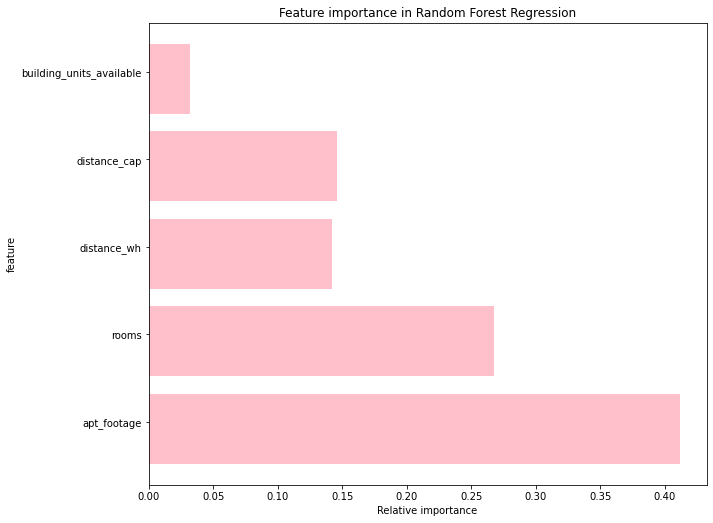

<Figure size 720x612 with 0 Axes>

In [23]:
# Plot most important features
import matplotlib.pyplot as plt
y = list_y
fig, ax = plt.subplots() 
width = 0.8
ind = np.arange(len(y)) 
ax.barh(ind, y,width, color="pink")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(labels, minor=False)
plt.title('Feature importance in Random Forest Regression')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(10,8.5))
fig.set_size_inches(10, 8.5, forward=True)

In [25]:
apts_ml

,apt_rent,apt_footage,rooms,distance_wh,distance_cap,building_units_available
0,1427,456,1,933,2966,52
1,1677,610,2,933,2966,52
2,2078,762,2,5893,7877,13
3,2876,1182,3,5893,7877,13
4,2078,762,2,5893,7877,13
...,...,...,...,...,...,...
1992,1311,480,1,1706,1734,1
1993,1651,719,2,1706,1734,1
1994,3135,1140,3,1706,1734,1
1995,2200,575,2,4547,2063,1


In [26]:
# create a new dataframe that is indexed like the trained model
newdata = pd.DataFrame().reindex_like(apts_ml)
newdata.fillna(value=0, inplace=True)

# delete the variable to be predicted
del newdata['apt_rent']
newdata = newdata.iloc[[1]]

# insert information about your apartment 
newdata['rooms'] = 3
newdata['apt_footage'] = 600
newdata['distance_wh'] = 3218
newdata['distance_cap'] = 5632
newdata['building_units_available'] = 2


rf.predict(newdata)

array([2666.935])